In [1]:
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
from common_classes import Filtrator, Fitter, Parameters, Measurement, SSPFMSignal
from commonmethods.utility_methods import get_bin_files_in_dir, natural_keys, read_floats
from scipy.signal import medfilt

C:\Users\ru\Documents\git\spm_data_analysis\common_classes\plotter.py:3: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "C:\Users\ru\Anaconda3\lib\runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "C:\Users\ru\Anaconda3\lib\runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "C:\Users\ru\Anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\ru\Anaconda3\lib\site-packages\traitlets\config\application.py", line 658, in launch_instance
    app.start()
  File "C:\Users\ru\Anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 477, in start
    ioloop.IOLoop.instance().start()
  File "C:\Users\ru\An

In [2]:
root = r'C:\Users\ru\Downloads\good_2'
#root = r'C:\Users\ru\Downloads\LaBFO_05_loops\LaBFO_05_loops'
input_dirs = [os.path.join(root, dir_name) for dir_name in sorted(os.listdir(root), key=natural_keys)]

In [3]:
def phase_func(w, w_res, Q):
    #return -np.arctan(1/(w*w_res / (Q*(np.square(w) - np.square(w_res)))))
    return np.arctan((w*w_res / (Q*(np.square(w) - np.square(w_res)))))

In [4]:
loop_file = r'C:\Users\ru\Documents\git\spm_data_analysis\computation_results\17062018\steps\vals\phase\LaBFO_05__100.txt'
loop = read_floats(loop_file)
main_vdc = SSPFMSignal(steps_per_grows=20,
                       points_per_step=4,
                       points_per_zero=4,
                       number_of_cycles=1,
                       amp_start=1,
                       amp_end=1,
                       bipolar=1,
                       replace_zeros=True)
cycle_0 = main_vdc.step_values[main_vdc.get_cycle_step_indices(0)]
argmax = np.argmax(cycle_0)
argmin = np.argmin(cycle_0)
print(
argmax,
argmin
)
print(loop[argmax], loop[argmin])
print(len(loop))
full_step = main_vdc.points_per_step + main_vdc.points_per_zero

min_start = argmin*(full_step)
max_start = argmax*full_step
print(main_vdc.voltage[min_start:min_start+full_step])
print(main_vdc.voltage[max_start:max_start+full_step])


20 60
0.00420570309776 0.000454970151545
81
[-1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0, -1.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


C:\Users\ru\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:779: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)
C:\Users\ru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


phase at min 1.57079615818


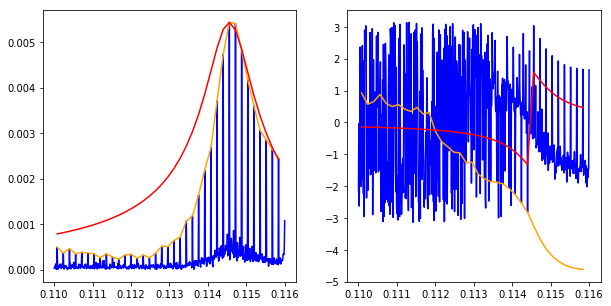

In [13]:
dir_index = 99
input_dir = input_dirs[dir_index]
dir_w_files = os.path.join(input_dir, 'fourier_amp_ph')
parameters = Parameters.read_from_file(os.path.join(input_dir, 'paramiters.txt'))
filtration_start = 8
fitter = Fitter(parameters)
filtrator = Filtrator(filtration_start, parameters.bins_number, filt_window={'amp': 1, 'phase':1})
#filtrator = Filtrator(filtration_start, parameters.bins_number)
dir_files = get_bin_files_in_dir(dir_w_files)
file_index = min_start + 1
filename = dir_files[file_index]
data = Measurement.read_from_file(filename)
#data.phase = medfilt(data.phase)
meas = filtrator.filter_measurement(data)
meas.phase = np.unwrap(meas.phase)
#meas.phase = medfilt(meas.phase,3)
fit = fitter.fit(meas)
fitted_amp = fitter.eval_fitted_amp(meas, fit)
fitted_phase = phase_func(meas.freq, fit.w_res, fit.Q)
peak_point = np.abs(meas.freq-fit.w_res).argmin()

fig, ax = plt.subplots(1, 2, figsize=(10,5))
ax[0].plot(data.freq, data.amp,color='blue')
ax[0].plot(meas.freq, meas.amp, color='orange')
ax[0].plot(meas.freq, fitted_amp, color='red')
#ax[0].scatter(meas.freq[peak_point], meas.amp[peak_point], color='black')

ax[1].plot(data.freq, data.phase, color='blue')
ax[1].plot(meas.freq, meas.phase, color='orange')
ax[1].plot(meas.freq, fitted_phase, color='red')
#ax[1].scatter(meas.freq[peak_point], meas.phase[peak_point], color='black')
#ax[1].scatter(meas.freq[peak_point], fitted_phase[peak_point], color='black')
#ax[1].scatter(fit.w_res, phase_func(fit.w_res,fit.w_res,fit.Q),color='black')
print('phase at min', phase_func(meas.freq[peak_point],fit.w_res,fit.Q))
#print(fitted_phase[peak_point])
#print(meas.phase[peak_point])

In [6]:
print(phase_func(fit.w_res, fit.w_res, fit.Q))

1.57079632679


C:\Users\ru\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in double_scalars
  This is separate from the ipykernel package so we can avoid doing imports until


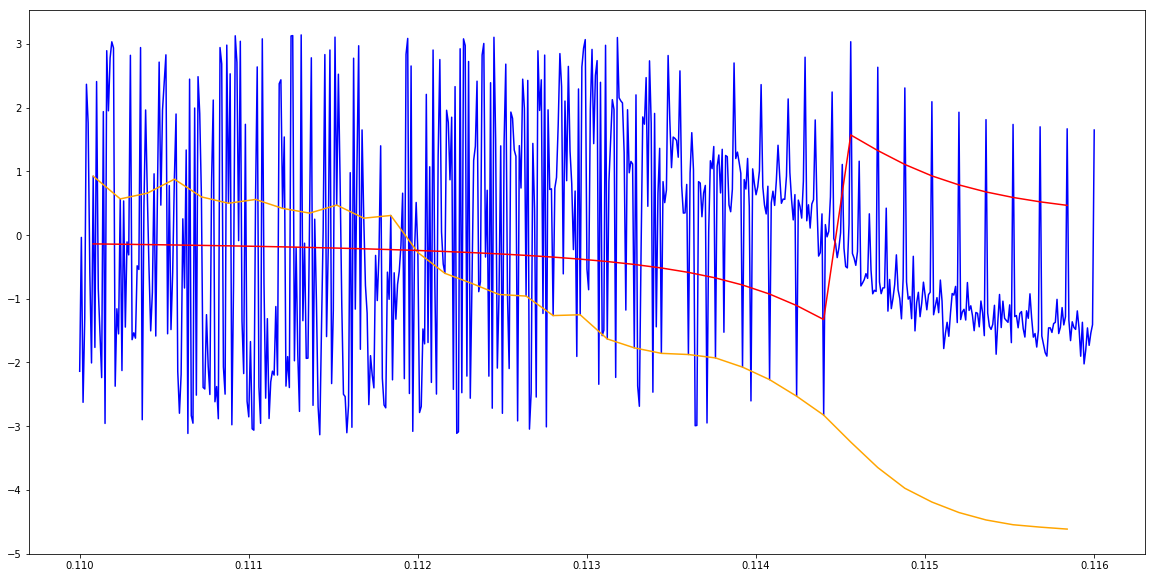

In [19]:
fig, ax = plt.subplots(figsize=(20,10))

ax.plot(data.freq, data.phase, color='blue')
ax.plot(meas.freq, np.unwrap(meas.phase, discont=np.pi*2), color='orange')
ax.plot(meas.freq, fitted_phase, color='red')

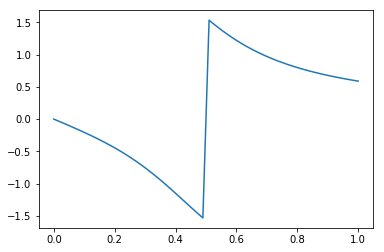

In [8]:
grid = np.linspace(0,1,50)
plt.plot(grid, phase_func(grid, 0.5, 1))